# Exploratory Analysis Step (Etapa de Análise Exploratória)
**[EN-US]**

Step of exploratory analysis of the data that was extracted from the API.

**[PT-BR]**

Etapa da análise exploratória dos dados que foram extraídos da API.

## Table of Contents
* [Packages](#1)
* [Exploratory Data Analysis](#2)
    * [Feature Engineering](#2.1)

<a name="1"></a>
## Packages (Pacotes)
**[EN-US]**

Packages used in the system.
* [pandas](https://pandas.pydata.org/): is the main package for data manipulation;
* [numpy](www.numpy.org): is the main package for scientific computing;
* [re](https://docs.python.org/3/library/re.html): provides regular expression matching operations similar to those found in Perl;
* [collections](https://docs.python.org/3/library/collections.html#collections):  implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple;
* [nltk](https://www.nltk.org/): NLTK is a leading platform for building Python programs to work with human language data;
* [matplotlib](http://matplotlib.org): is a library to plot graphs;
* [PIL](https://pillow.readthedocs.io/en/stable/): Python Imaging Library adds image processing capabilities to your Python interpreter;
* [wordcloud](https://pypi.org/project/wordcloud/): a little word cloud generator in Python;
* [os](https://docs.python.org/3/library/os.html): built-in module, provides a portable way of using operating system dependent functionality;
* [sys](https://docs.python.org/3/library/sys.html): provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter;
* [src](../src/): package with all the codes for all utility functions created for this system.

**[PT-BR]**

Pacotes utilizados no sistema.
* [pandas](https://pandas.pydata.org/): é o principal pacote para manipulação de dados;
* [numpy](www.numpy.org): é o principal pacote para computação científica;
* [re](https://docs.python.org/3/library/re.html): fornece operações de correspondência de expressões regulares semelhantes às encontradas em Perl;
* [collections](https://docs.python.org/3/library/collections.html#collections): implementa tipos de dados de contêiner especializados, fornecendo alternativas aos contêineres integrados de uso geral do Python, dict, list, set e tuple;
* [nltk](https://www.nltk.org/): NLTK é uma plataforma líder para a construção de programas Python para trabalhar com dados de linguagem humana;
* [matplotlib](http://matplotlib.org): é uma biblioteca para plotar gráficos;
* [PIL](https://pillow.readthedocs.io/en/stable/): Python Imaging Library adiciona recursos de processamento de imagem ao seu interpretador Python;
* [wordcloud](https://pypi.org/project/wordcloud/): um pequeno gerador de nuvem de palavras em Python;
* [os](https://docs.python.org/3/library/os.html): módulo integrado, fornece uma maneira portátil de usar funcionalidades dependentes do sistema operacional;
* [sys](https://docs.python.org/3/library/sys.html): fornece acesso a algumas variáveis usadas ou mantidas pelo interpretador e a funções que interagem fortemente com o interpretador;
* [src](../src/): pacote com todos os códigos de todas as funções utilitárias criadas para esse sistema.

In [29]:
import pandas as pd
import numpy as np

import os
import sys
PROJECT_ROOT = os.path.abspath( # Getting Obtaining the absolute normalized version of the project root path (Obtendo a versão absoluta normalizada do path raíz do projeto)
    os.path.join( # Concatenating the paths (Concatenando os paths)
        os.getcwd(), # # Getting the path of the notebooks directory (Obtendo o path do diretório dos notebooks)
        os.pardir # Gettin the constant string used by the OS to refer to the parent directory (Obtendo a string constante usada pelo OS para fazer referência ao diretório pai)
    )
)
# Adding path to the list of strings that specify the search path for modules
# Adicionando o path à lista de strings que especifica o path de pesquisa para os módulos
sys.path.append(PROJECT_ROOT)
from src.eda import *

**[EN-US]**

> **Note**: the codes for the utility functions used in this system are in the `eda.py` script within the `../src/` directory.

**[PT-BR]**

> **Nota**: os códigos para as funções utilitárias utilizadas nesse sistema estão no script `eda.py` dentro do diretório `../src/`.

<a name="2"></a>
## Exploratory Data Analysis (EDA)
**[EN-US]**

Exploratory Data Analysis.

Dataset structure:
* `id`: the unique identifier for the comic.
* `title`: the title of the comic.
* `description`: a summary or description of the comic.
* `y`: the target value comic's sentiment label.

**[PT-BR]**

Análise de Dados Exploratória.

Estrutura do dataset:
* `id`: o identificador exclusivo do quadrinho..
* `title`: o título do comic.
* `description`: um resumo ou descrição do comic.
* `y`: o rótulo de sentimento alvo do comic.

Reading the dataset from the `../data/raw/` directory, checking its size and projecting the first 5 examples (Lendo o dataset do diretório `../data/raw/`, verificando a sua dimensão e projetando os primeiros 5 exemplos).

In [92]:
comics_data = pd.read_csv('../data/raw/comics_corpus.csv')
print(f'Comics data shape: {comics_data.shape}')
comics_data.head()

Comics data shape: (16927, 4)


,id,title,description,y
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action


Setting the global variable with the colors for the plots that will be created later (Definindo a variável global com as cores para os plots que serão criados posteriormente).

In [95]:
COLORS = ['cornflowerblue', 'chocolate']

Counting null values (Contando os valores nulos).

In [100]:
print(f'Null values in comics dataset:\n{comics_data.isnull().sum()}')

Null values in comics dataset:
id             0
title          0
description    0
y              0
dtype: int64


Analyzing the distribution of the target label $y$ (Analisando a distribuição do rótulo alvo $y$).

In [18]:
comics_data['y'].value_counts()

y
action        10582
non-action     6345
Name: count, dtype: int64

Examining the `index` example for the `label` label examples (Examinando o exemplo `index` para os exemplos do rótulo `label`).

In [20]:
index = 0
label = 'action'

comic_sentence = comics_data[comics_data['y'] == label]['description'].tolist()[index]
print(f'Comic {index + 1} Label: {label}\n\nText {index + 1} example: {comic_sentence}')

Comic 1 Label: action

Text 1 example: CHILDREN OF THE AFTERLIFE! While Kraven the Hunter stalks Jane Foster on Midgard and the newest Valkyrie fights for her soul on Perdita, Karnilla, the queen of Hel, works a miracle in the land of the dead! But Karnilla isn’t Hel’s only ruler—and now she’s upset the cosmic balance. There will be a price to pay…and Karnilla intends to ensure the Valkyries pay it.


**[EN-US]**

Performing descriptive analysis. We perform descriptive analysis to help identify problems, for example, we can observe that some data from the `title` feature is duplicated, only 16855 unique examples, out of 16927. But, we will not treat this, because we will not use this feature in the model.

**[PT-BR]**

Executando a análise descritiva. Fazemos a análise descritiva para ajudar identificar problemas, por exemplo, podemos observar que alguns dados da feature `title` estão duplicados, apenas 16855 exemplos únicos, de 16927. Mas, não vamos tratar isso, porque não vamos utilizar essa feature no modelo.

In [22]:
comics_data.iloc[:, 1:].describe().T

,count,unique,top,freq
title,16927,16855,100th Anniversary Special (2014) #1,5
description,16927,16927,CONCLUDING THIS CHILLING CHAPTER OF STEPHEN KI...,1
y,16927,2,action,10582


Analyzing the type of each feature and whether there are null values (Analisando o tipo de cada feature e se há valores nulos).

In [24]:
comics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16927 entries, 0 to 16926
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           16927 non-null  int64 
 1   title        16927 non-null  object
 2   description  16927 non-null  object
 3   y            16927 non-null  object
dtypes: int64(1), object(3)
memory usage: 529.1+ KB


Plotting the distribution and count between the 2 labels, the `action` and the `non-action` (Plotando a distribuição e a contagem entre os 2 rótulos, o `action` e o `non-action`).

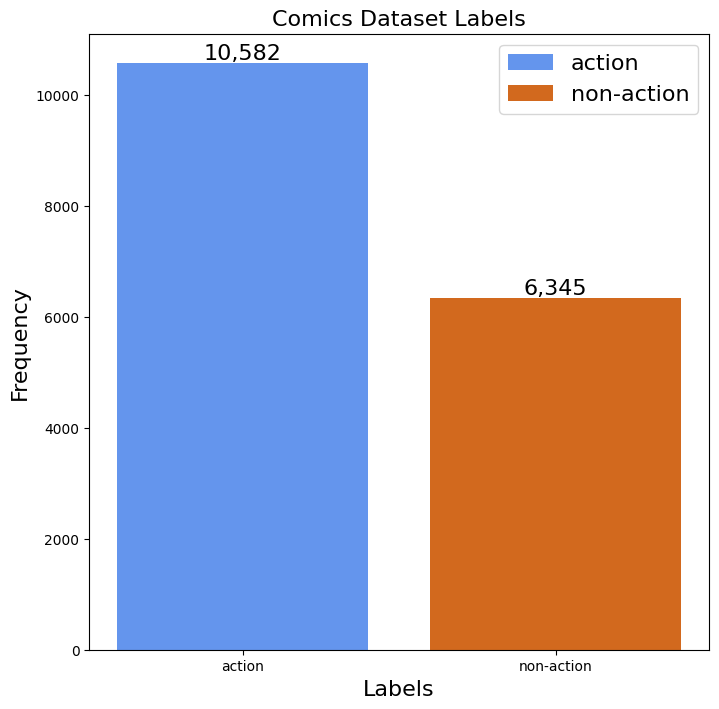

In [26]:
plot_bar(comics_data, colors=COLORS, name='comics_labels')

**[EN-US]**

Plotting a wordcloud with the most frequent words in the corpus, that is, the `description` feature, which will be used in the model. The stopwords were excluded, so that we could only see the words that really have importance and meaning.

**[PT-BR]**

Plotando uma wordcloud com as palavras mais frequentes do corpus, ou seja, a feature `description`, que será utilizada no modelo. As stopwords foram excluídas, para visualizarmos apenas as palavras que realmente têm importância e significado.

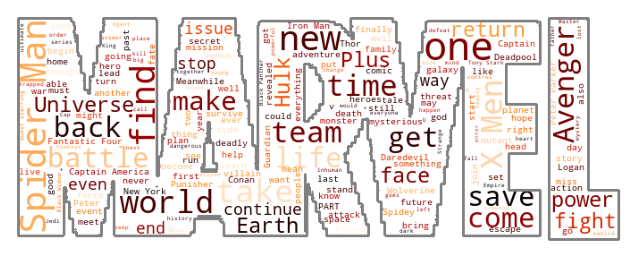

In [28]:
plot_wordcloud(comics_data, name='marvel_wordcloud')

Plotting the frequency of the words that appear most in the corpus, except stopwords, divided between the labels `action` and `non-action` (Plotando a frequência das palavras que mais aparecem no corpus, exceto as stopwords, dividas entre os labels `action` e `non-action`).

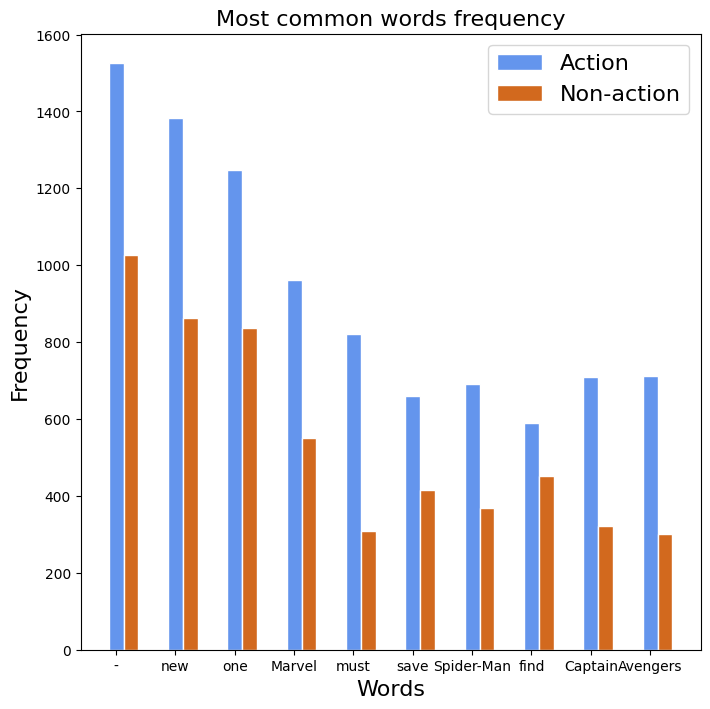

In [40]:
plot_word_frequency(
    comics_data,
    size=10,
    colors=COLORS,
    drop_stopwords=True,
    name='word_frequency'
)

<a name="2.1"></a>
## Feature Engineering
**[EN-US]**

Creating some features to help with the plots that will be created next, such as `sentence size`, `word count` in the sentence, `capslock word count` in the sentence and `unique word count` in the sentence.

**[PT-BR]**

Criando algumas features para ajudar nos plots que serão criados a seguir, como o `tamanho do texto`, `contagem de palavras` na frase, `contagem de palavras em capslock` na frase e `contagem de palavras únicas` na frase.

In [30]:
comics_data['sentence_size'] = comics_data['description'].map(lambda x: len(x) - x.count(' '))
comics_data['word_count'] = comics_data['description'].map(lambda x: len(x.split()))
comics_data['capslock_word_count'] = comics_data['description'].map(lambda x: len(re.findall(r'\b[A-Z]+\b', x)))
comics_data['unique_word_count'] = comics_data['description'].map(lambda x: len(set(x.split())))
comics_data.head()

,id,title,description,y,sentence_size,word_count,capslock_word_count,unique_word_count
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action,478,95,21,83
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,300,64,4,53
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,300,64,4,53
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action,247,52,9,47
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action,247,52,9,47


Plotting the comparison of the distribution between the `action` label and the `non-action` label in the features that were created (Plotando a comparação da distribuição entre o label `action` e o label `non-action` nas features que foram criadas).

Plotting the distribution comparison of the `sentence_size` feature (Plotando a comparação da distribuição da feature `sentence_size`).

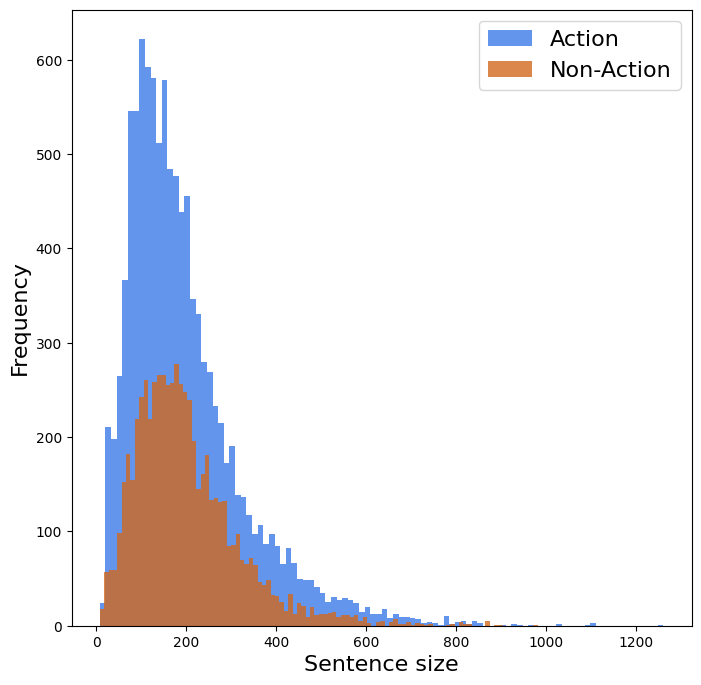

In [32]:
plot_hist_vs(
    comics_data, 
    'sentence_size', 
    xlabel='Sentence size',
    bins=100, 
    colors=COLORS,
    name='sentence_size'
)

Plotting the distribution comparison of the `word_count` feature (Plotando a comparação da distribuição da feature `word_count`).

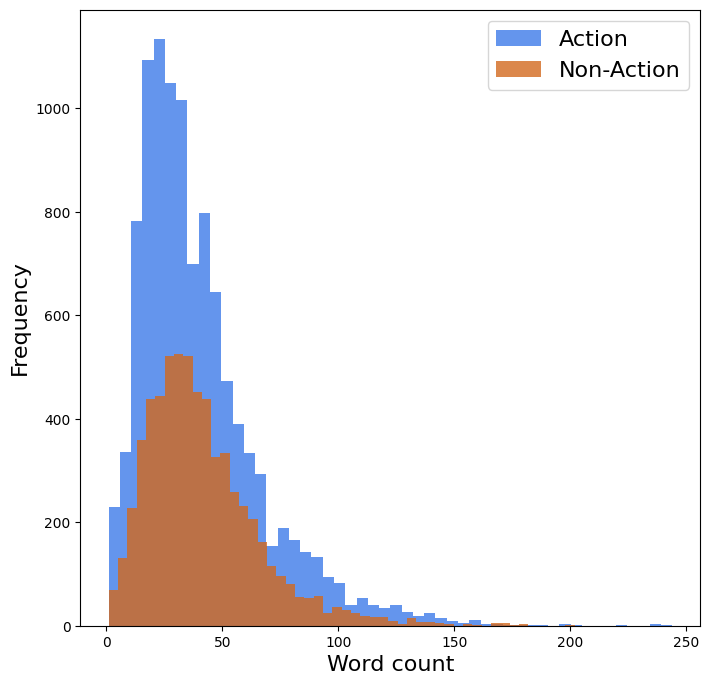

In [34]:
plot_hist_vs(
    comics_data,
    'word_count',
    xlabel='Word count',
    bins=50,
    colors=COLORS,
    name='word_count'
)

Plotting the distribution comparison of the `capslock_word_count` feature (Plotando a comparação da distribuição da feature `capslock_word_count`).

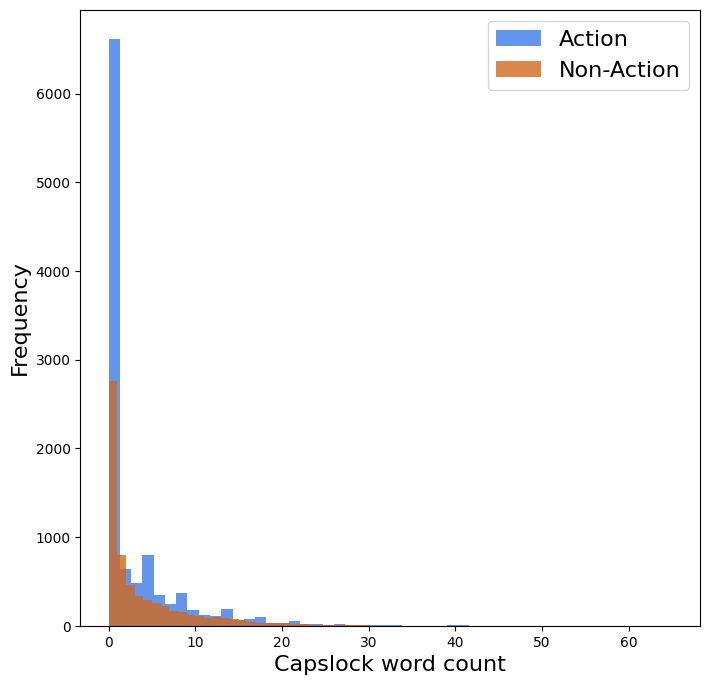

In [36]:
plot_hist_vs(
    comics_data, 
    'capslock_word_count', 
    xlabel='Capslock word count',
    bins=50,
    colors=COLORS,
    name='capslock_word_count'
)

Plotting the distribution comparison of the `unique_word_count` feature (Plotando a comparação da distribuição da feature `unique_word_count`).

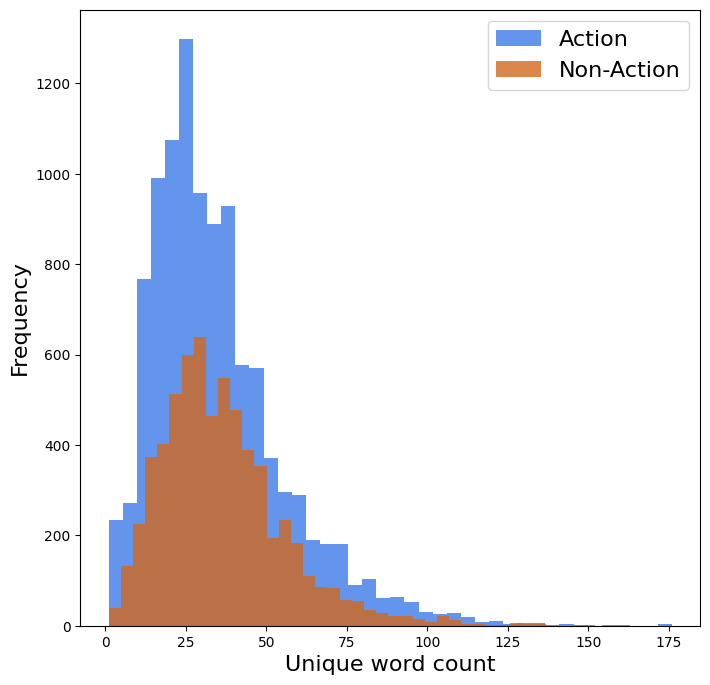

In [38]:
plot_hist_vs(
    comics_data, 
    'unique_word_count', 
    xlabel='Unique word count',
    bins=40,
    colors=COLORS,
    name='unique_word_count'
)